### Moises Quiroz

Notebook como introduccion a pytorch

In [1]:
# Importar pytorch
import torch
import matplotlib.pyplot as plt

In [2]:
# Funcion de activacion
def activation(x):
    # Sigmoide como funcion de activacion
    return 1/(1+torch.exp(-x))
    

In [3]:
# Genarando algo de data
torch.manual_seed(7)

#Features 5 variables aleatorias, 1 columna 5 filas
features = torch.randn((1,5))

#Weights, variables random con la misma distribucion

weights = torch.randn_like(features)

# El bias

bias = torch.randn((1,1))

In [4]:
print(features,weights,bias)

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]]) tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]]) tensor([[0.3177]])


Una prediccion simple

In [5]:
def output(features,weights,bias):
    return activation(torch.sum(features*weights)+bias) ##torch.mm(features,weights.t())+bias
output(features,weights,bias)

tensor([[0.1595]])

In [6]:
weights.view(5,1) # Se recomienda usar .view()

tensor([[-0.8948],
        [-0.3556],
        [ 1.2324],
        [ 0.1382],
        [-1.6822]])

##### Output para un multilayer

In [7]:
### Generando algo de data
torch.manual_seed(7)

features= torch.randn((1,3))
print(features)

#Definiendo las dimensiones de cada layer en la red

n_input = features.shape[1]
n_hidden = 2
n_output = 1

#weights por input para hidden layer
W1 = torch.randn(n_input,n_hidden)
W2 = torch.randn(n_hidden,n_output)

print(W1,W2)

# y el termino bias para el hidden y el output

B1 = torch.randn((1,n_hidden))
B2 = torch.randn((1,n_output))

tensor([[-0.1468,  0.7861,  0.9468]])
tensor([[-1.1143,  1.6908],
        [-0.8948, -0.3556],
        [ 1.2324,  0.1382]]) tensor([[-1.6822],
        [ 0.3177]])


In [8]:
h = activation(torch.mm(features,W1)+B1)
output = activation(torch.mm(h,W2)+B2)
output # Prediccion

tensor([[0.3171]])

##### Numpy

In [9]:
import numpy as np

In [10]:
a = np.random.rand(4,3)
a

array([[0.17862309, 0.55795796, 0.3843166 ],
       [0.37868964, 0.46437442, 0.83900209],
       [0.28552609, 0.27510307, 0.74960895],
       [0.61238366, 0.96887876, 0.14867516]])

In [11]:
b = torch.from_numpy(a)
b

tensor([[0.1786, 0.5580, 0.3843],
        [0.3787, 0.4644, 0.8390],
        [0.2855, 0.2751, 0.7496],
        [0.6124, 0.9689, 0.1487]], dtype=torch.float64)

In [12]:
b.numpy()

array([[0.17862309, 0.55795796, 0.3843166 ],
       [0.37868964, 0.46437442, 0.83900209],
       [0.28552609, 0.27510307, 0.74960895],
       [0.61238366, 0.96887876, 0.14867516]])

####  Mnist

In [13]:
from torchvision import datasets, transforms


#Define una transformacion para normalizar la data 
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

#Dowload and load the training data

trainset = datasets.MNIST('MNIST_data/',download = True,train = True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [14]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train

In [15]:
dataiter = iter(trainloader)
images, label = dataiter.next()

In [16]:
images.shape

torch.Size([64, 1, 28, 28])

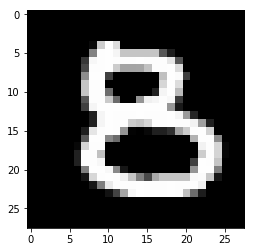

In [17]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [18]:
Imag = images.view(images.shape[0], -1)

Imag

In [19]:
n_input = Imag.shape[1]
n_hidden = 256
n_output = 10

In [20]:
W1 = torch.randn(n_input,n_hidden)
W2 = torch.randn(n_hidden,n_output)
B1 = torch.randn(n_hidden)
B2 = torch.randn(n_output)

In [21]:
h = activation(torch.mm(Imag,W1)+B1)

In [22]:
output = activation(torch.mm(h,W2)+B2)

In [25]:
torch.exp(W1)

tensor([[ 0.6977,  0.4817,  0.7772,  ...,  1.0160,  0.3812,  2.1565],
        [ 1.1546,  0.1195,  1.8899,  ...,  0.7064,  4.7487,  0.4544],
        [ 0.1213,  1.4656,  0.3479,  ...,  2.5171,  0.1050,  3.8630],
        ...,
        [ 2.0608,  0.3045,  0.7462,  ...,  1.3487, 30.3469,  1.1908],
        [ 1.3371,  1.1689,  0.1964,  ...,  1.3220,  2.7175,  2.2597],
        [ 0.7054,  0.4288,  1.5648,  ...,  2.5338,  0.8202,  0.5277]])

In [34]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim =1).view(-1,1)

In [36]:
prob = softmax(output)
prob

tensor([[0.0458, 0.1233, 0.1202, 0.1244, 0.1237, 0.0460, 0.1244, 0.1244, 0.0458,
         0.1221],
        [0.0698, 0.0587, 0.0736, 0.1417, 0.1593, 0.0611, 0.1593, 0.1593, 0.0586,
         0.0586],
        [0.0512, 0.1349, 0.0743, 0.1388, 0.1385, 0.0859, 0.0839, 0.1388, 0.0511,
         0.1026],
        [0.0486, 0.0711, 0.1316, 0.1317, 0.1317, 0.0530, 0.1317, 0.1317, 0.0484,
         0.1206],
        [0.0617, 0.1262, 0.1284, 0.1234, 0.1285, 0.0473, 0.1284, 0.1282, 0.0473,
         0.0808],
        [0.0517, 0.1406, 0.0724, 0.1395, 0.1404, 0.0518, 0.1392, 0.1406, 0.0517,
         0.0721],
        [0.0474, 0.1247, 0.1285, 0.1254, 0.1287, 0.0473, 0.1275, 0.1287, 0.0473,
         0.0946],
        [0.0516, 0.0569, 0.1242, 0.1379, 0.1342, 0.1186, 0.1372, 0.1379, 0.0507,
         0.0508],
        [0.0550, 0.1421, 0.0759, 0.1436, 0.1423, 0.0528, 0.1379, 0.1430, 0.0528,
         0.0545],
        [0.0568, 0.0568, 0.0571, 0.1538, 0.1541, 0.0568, 0.1055, 0.1541, 0.0567,
         0.1484],
        [0

In [37]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Input to hidden layer linear transformation
        
        self.hidden = nn.Linear(784,256)
        
        #Output layer 10 units - one for each digit
        
        self.output = nn.Linear(256,10)
        
        #define sigmoid activation and softmax output
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self,x):
        #pass the tensor input's for each of the operation
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [38]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [39]:
import  torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Input to hidden layer linear transformation
        
        self.hidden = nn.Linear(784,256)
        
        #Output layer 10 units - one for each digit
        
        self.output = nn.Linear(256,10)
        
    def forward(self,x):
        #pass the tensor input's for each of the operation
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x),dim = 1)
        
        return x

In [40]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [41]:
class Network2(nn.Module):
    def __init__(self):
        super().__init__()
        #Input to hidden layer linear transformation
        self.hidden = nn.Linear(784,128)
        self.hidden2 = nn.Linear(128,64)
        #Output layer 10 units - one for each digit
        self.output = nn.Linear(64,10)
    def forward(self,x):
        #pass the tensor input's for each of the operation
        x = F.relu(self.hidden(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x),dim = 1)
        x = F.cross_entropy(x)
        return x

In [42]:
model = Network2()

In [43]:
model

Network2(
  (hidden): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [44]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.2855, grad_fn=<NllLossBackward>)


In [46]:
from torch import optim
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.007931993460096
Training loss: 0.9067266142126847
Training loss: 0.525845499053947
Training loss: 0.4324361214092545
Training loss: 0.3873966612350712


In [48]:
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

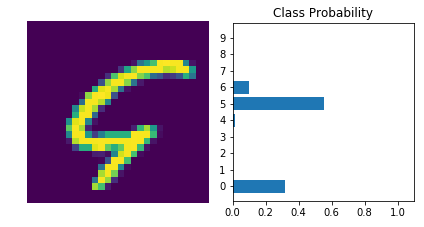

In [55]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[3].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)